In [1]:
import collections
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from game import *

In [2]:
with open("group_b_gs2_history.pkl", "rb") as fp:
    data: dict[str, list[int]] = pickle.load(fp)

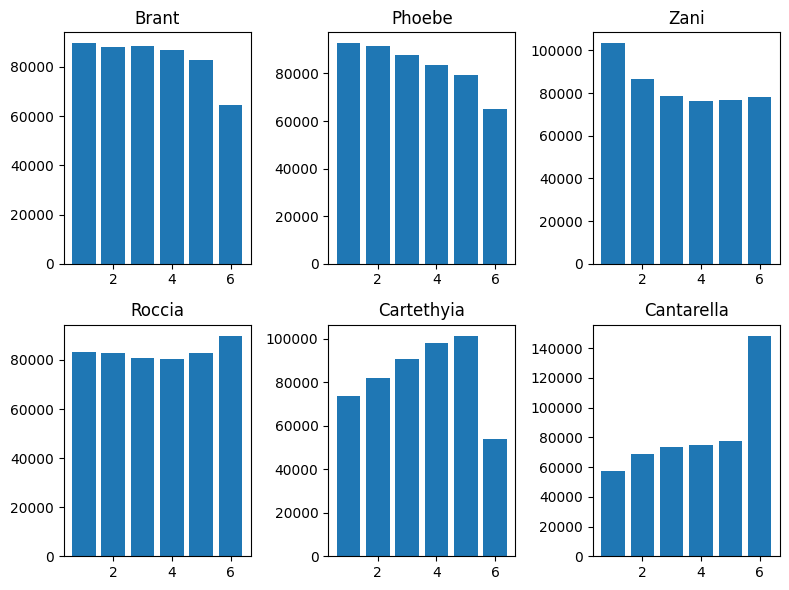

In [3]:
# Create subplots
columns = 3
rows = (len(data) + columns - 1) // columns
fig, axes = plt.subplots(rows, columns, figsize=(8, 6))

# Plot each array separately
axes = axes.flatten()

for i, (name, values) in enumerate(data.items()):
    counter = collections.Counter(values)
    axes[i].bar(counter.keys(), counter.values())
    axes[i].set_title(name)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [4]:
analysis = {}

for char, ranks in data.items():
    ranks = np.array(ranks)
    analysis[char] = {
        "Mean Rank": np.mean(ranks),
        "Median Rank": np.median(ranks),
        "Std Rank": np.std(ranks),
        "P(top1)": np.sum(ranks <= 1) / len(ranks),
        "P(top2)": np.sum(ranks <= 2) / len(ranks),
        "P(top3)": np.sum(ranks <= 3) / len(ranks)
    }

pd.DataFrame(analysis).T.sort_values(by="P(top1)", ascending=False)

,Mean Rank,Median Rank,Std Rank,P(top1),P(top2),P(top3)
Zani,3.340846,3.0,1.748043,0.206638,0.380258,0.537928
Phoebe,3.321690,3.0,1.672264,0.185330,0.368422,0.544086
Brant,3.357720,3.0,1.662467,0.179148,0.355262,0.531922
Roccia,3.533780,4.0,1.728161,0.166284,0.331578,0.493414
Cartethyia,3.465880,4.0,1.585746,0.147596,0.311624,0.493190
Cantarella,3.980084,4.0,1.752940,0.115004,0.252856,0.399460
